In [29]:
from mmdet.apis import init_detector, inference_detector
import mmcv
from utils.myTools import show

In [30]:
# 指定模型的配置文件和 checkpoint 文件路径
config_file = '/home/xxy/mmdetection/work_dirs/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco_FlatCosineAnnealing/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco.py'
checkpoint_file = '/home/xxy/mmdetection/work_dirs/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco_FlatCosineAnnealing/epoch_2000.pth'

In [31]:
# 根据配置文件和 checkpoint 文件构建模型
model = init_detector(config_file, checkpoint_file, device='cuda:1')

load checkpoint from local path: /home/xxy/mmdetection/work_dirs/mask2former_swin-s-p4-w7-224_lsj_8x2_50e_coco_FlatCosineAnnealing/epoch_2000.pth


In [32]:
img = '../datasets/lingshui/30fps300s/0001.jpg'  # 或者 img = mmcv.imread(img)，这样图片仅会被读一次
img = mmcv.imread(img)
result = inference_detector(model, img)

/home/xxy/miniconda3/envs/mmlab/lib/python3.7/site-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/home/xxy/miniconda3/envs/mmlab/lib/python3.7/site-packages/mmdet/models/utils/positional_encoding.py:81: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature**(2 * (dim_t // 2) / self.num_feats)
/home/xxy/miniconda3/envs/mmlab/lib/python3.7/site-packages/mmdet/models/seg_heads/panoptic_fusion_heads/maskformer_fusion_head.p

<class 'tuple'> 2 <class 'list'> <class 'list'>
1 <class 'numpy.ndarray'> (100, 5) [153.         765.         466.         853.           0.97808737]
1 <class 'list'> 100 <class 'numpy.ndarray'> (1080, 1920)
(1080, 1920)
[[153.0, 765.0, 466.0, 853.0, 0.9780873656272888], [654.0, 819.0, 1046.0, 1077.0, 0.017901400104165077], [1169.0, 683.0, 1639.0, 964.0, 0.0012952901888638735], [317.0, 189.0, 817.0, 450.0, 0.004569066688418388], [997.0, 402.0, 1172.0, 684.0, 0.007832836359739304], [899.0, 350.0, 1013.0, 433.0, 0.9866206645965576], [1170.0, 683.0, 1575.0, 958.0, 0.001568625564686954], [0.0, 0.0, 0.0, 0.0, 0.0], [359.0, 358.0, 778.0, 766.0, 0.0019145538099110126], [1138.0, 577.0, 1174.0, 684.0, 0.029058441519737244], [970.0, 0.0, 1356.0, 89.0, 0.0025375159457325935], [316.0, 214.0, 809.0, 452.0, 0.0031446432694792747], [629.0, 647.0, 1065.0, 775.0, 0.0009732362814247608], [1188.0, 608.0, 1486.0, 883.0, 0.00211884081363678], [927.0, 583.0, 1236.0, 658.0, 0.9757044911384583], [540.0, 596.0

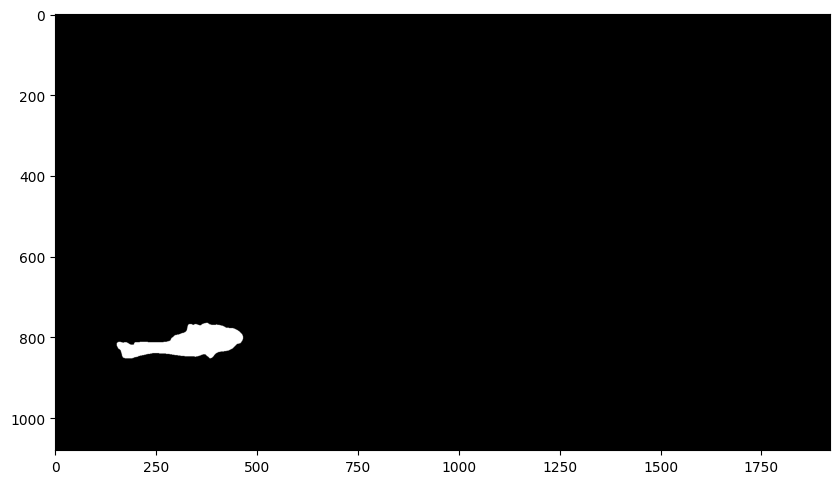

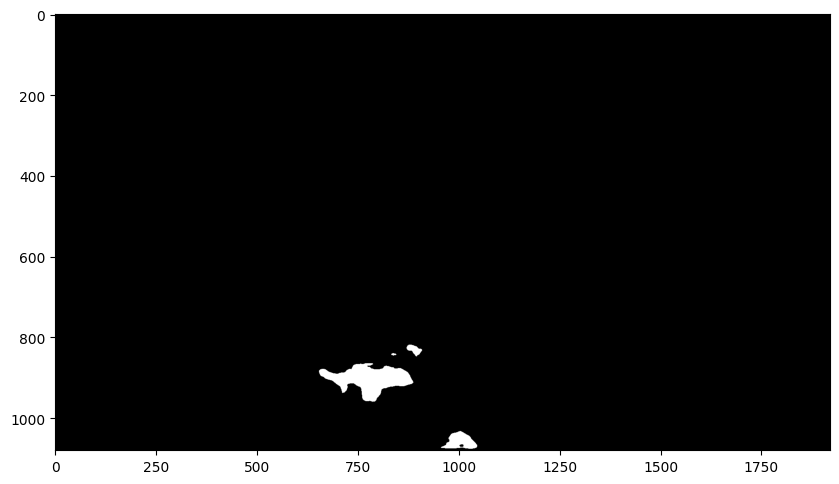

In [38]:
print(type(result),len(result),type(result[0]),type(result[1]))
print(len(result[0]),type(result[0][0]),result[0][0].shape,result[0][0][0])
print(len(result[1]),type(result[1][0]),len(result[1][0]),type(result[1][0][0]),result[1][0][0].shape)
print(result[1][0][0].shape)
print(result[0][0].tolist())
show(result[1][0][0],figsize=(10,10))
show(result[1][0][1],figsize=(10,10))
# ( [np.array(100个检测框：[x1,y1,w,h,p],[],..)],  [[100个mask：np.array(..),np.array()，..]]  )